In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("../stack-overflow-developer-survey-results-2023/survey_results_public.csv")

In [3]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [4]:
df.shape

(89184, 84)

In [5]:
df.isna().sum()

ResponseId                                 0
Q120                                       0
MainBranch                                 0
Age                                        0
Employment                              1286
RemoteWork                             15374
CodingActivities                       15420
EdLevel                                 1211
LearnCode                               1521
LearnCodeOnline                        19100
LearnCodeCoursesCert                   52108
YearsCode                               1749
YearsCodePro                           23048
DevType                                12312
OrgSize                                24141
PurchaseInfluence                      24220
TechList                               28333
BuyNewTool                              6175
Country                                 1211
Currency                               23850
CompTotal                              40959
LanguageHaveWorkedWith                  2044
LanguageWa

### Profession (Percentage count)

In [6]:
np.round(df['MainBranch'].value_counts(normalize = True) * 100.0,2)

MainBranch
I am a developer by profession                                                           75.39
I am not primarily a developer, but I write code sometimes as part of my work/studies    10.04
I am learning to code                                                                     5.56
I code primarily as a hobby                                                               5.56
I used to be a developer by profession, but no longer am                                  2.09
None of these                                                                             1.36
Name: proportion, dtype: float64

<Axes: title={'center': 'Profession'}, xlabel='MainBranch'>

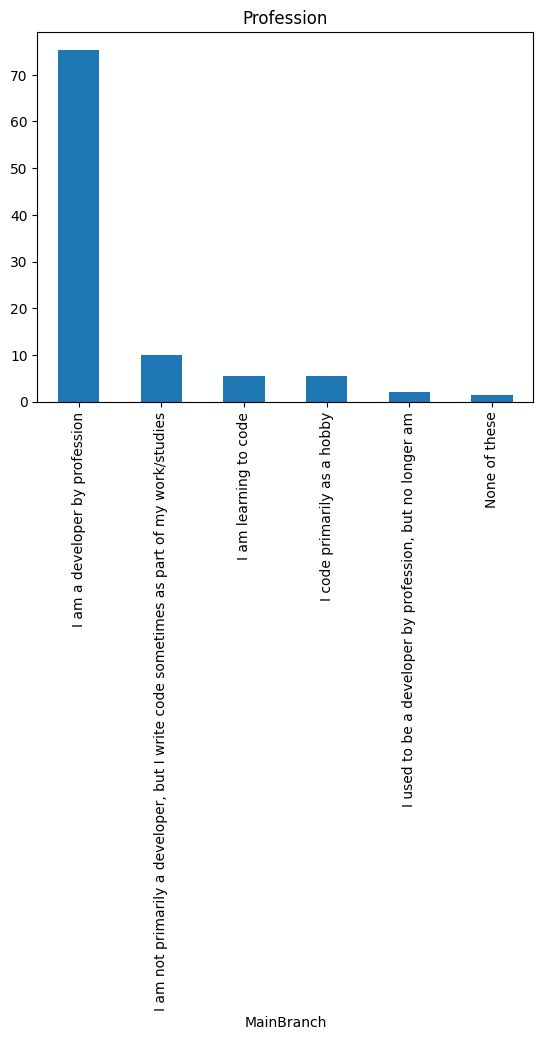

In [7]:
(df['MainBranch'].value_counts(normalize = True) * 100.0).plot(kind = 'bar',title = 'Profession')

### Age category count

In [8]:
df['Age'].value_counts()

Age
25-34 years old       33247
35-44 years old       20532
18-24 years old       17931
45-54 years old        8334
Under 18 years old     4128
55-64 years old        3392
65 years or older      1171
Prefer not to say       449
Name: count, dtype: int64

### Country count

In [9]:
df['Country'].value_counts()

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Italy                                                    1835
Spain                                                    1834
Sweden                                                   1641
Switzerland                                              1149
Russian Federation                                       1094
Czech Republic                                           1072


### Function to extract countries having atleast 1000 data points.

In [10]:
def countries_to_consider(column_counts, threshold = 1000):
    result = []
    column_list = zip(column_counts.index, column_counts.values)
    for country, count in column_list:
        if count >= threshold:
            result.append(country)
    return result

countries_shortlisted = countries_to_consider(df['Country'].value_counts())

In [11]:
countries_shortlisted

['United States of America',
 'Germany',
 'India',
 'United Kingdom of Great Britain and Northern Ireland',
 'Canada',
 'France',
 'Poland',
 'Netherlands',
 'Australia',
 'Brazil',
 'Italy',
 'Spain',
 'Sweden',
 'Switzerland',
 'Russian Federation',
 'Czech Republic',
 'Austria']

### Selecting countries with atleast 1000 data points per country

In [12]:
df_new = df[df['Country'].isin(countries_shortlisted)]

In [13]:
df_new['Country'].value_counts()

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Italy                                                    1835
Spain                                                    1834
Sweden                                                   1641
Switzerland                                              1149
Russian Federation                                       1094
Czech Republic                                           1072


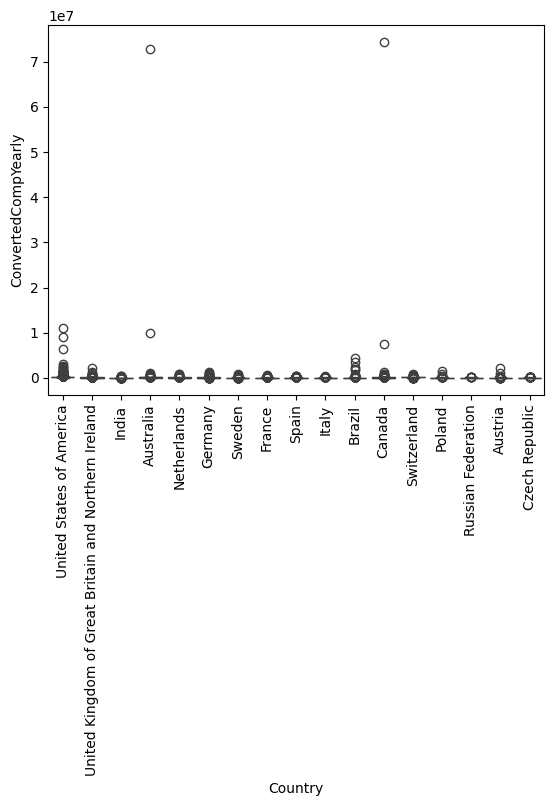

In [14]:
sns.boxplot(data = df_new, x = 'Country', y = 'ConvertedCompYearly')
plt.xticks(rotation = 90)
plt.show()

In [15]:
df_new['ConvertedCompYearly'].describe()

count    3.559000e+04
mean     1.123770e+05
std      5.690830e+05
min      1.000000e+00
25%      5.354500e+04
50%      8.567200e+04
75%      1.380000e+05
max      7.435143e+07
Name: ConvertedCompYearly, dtype: float64

In [16]:
df_new['Country'].value_counts()

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Italy                                                    1835
Spain                                                    1834
Sweden                                                   1641
Switzerland                                              1149
Russian Federation                                       1094
Czech Republic                                           1072


In [17]:
df_new.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,250000.0,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Heli

In [18]:
df_new.isna().sum()

ResponseId                                 0
Q120                                       0
MainBranch                                 0
Age                                        0
Employment                                47
RemoteWork                              9445
CodingActivities                        9468
EdLevel                                    0
LearnCode                                219
LearnCodeOnline                        12499
LearnCodeCoursesCert                   37849
YearsCode                                327
YearsCodePro                           14536
DevType                                 7653
OrgSize                                15387
PurchaseInfluence                      15426
TechList                               19263
BuyNewTool                              3667
Country                                    0
Currency                               15194
CompTotal                              26470
LanguageHaveWorkedWith                   481
LanguageWa

----

### Selected the following columns based on intuition:

* MainBranch
* Age
* Employment
* EdLevel
* YearsCode
* YearsCodePro
* DevType
* Country
* CompTotal
* ConvertedCompYearly
* WorkExp
* Industry
* Currency
* OrgSize
* ICorPM

In [19]:
required_cols = ['MainBranch', 'Age','Employment','EdLevel','YearsCode','YearsCodePro', 'DevType','Country','CompTotal','ConvertedCompYearly',
                'WorkExp','Industry','Currency','OrgSize','ICorPM']

df_final = df_new[required_cols]
df_final.head()

,MainBranch,Age,Employment,EdLevel,YearsCode,YearsCodePro,DevType,Country,CompTotal,ConvertedCompYearly,WorkExp,Industry,Currency,OrgSize,ICorPM
1,I am a developer by profession,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",United States of America,285000.0,285000.0,10.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,2 to 9 employees,People manager
2,I am a developer by profession,45-54 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end",United States of America,250000.0,250000.0,23.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"5,000 to 9,999 employees",Individual contributor
3,I am a developer by profession,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",United States of America,156000.0,156000.0,7.0,NaN,USD\tUnited States dollar,100 to 499 employees,Individual contributor
5,I am a developer by profession,35-44 years old,"Employed, full-time",Some college/university study without earning ...,21,21,"Developer, back-end",United Kingdom of Great Britain and Northern I...,78000.0,96828.0,22.0,Other,GBP\tPound sterling,100 to 499 employees,Individual contributor
6,I am a developer by profession,35-44 years old,"Employed, full-time",Some college/university study without earning ...,4,3,"Developer, full-stack",United States of America,135000.0,135000.0,4.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"1,000 to 4,999 employees",Individual contributor


In [20]:
df_final.isna().sum()

MainBranch                 0
Age                        0
Employment                47
EdLevel                    0
YearsCode                327
YearsCodePro           14536
DevType                 7653
Country                    0
CompTotal              26470
ConvertedCompYearly    26598
WorkExp                31183
Industry               36054
Currency               15194
OrgSize                15387
ICorPM                 31146
dtype: int64

### Naively dropping all the NA entries from the dataframe, just to see the left over data points.

In [21]:
df_final = df_final.dropna()

In [22]:
df_final.shape

(20195, 15)

In [23]:
df_final.head()

,MainBranch,Age,Employment,EdLevel,YearsCode,YearsCodePro,DevType,Country,CompTotal,ConvertedCompYearly,WorkExp,Industry,Currency,OrgSize,ICorPM
1,I am a developer by profession,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",United States of America,285000.0,285000.0,10.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,2 to 9 employees,People manager
2,I am a developer by profession,45-54 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end",United States of America,250000.0,250000.0,23.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"5,000 to 9,999 employees",Individual contributor
5,I am a developer by profession,35-44 years old,"Employed, full-time",Some college/university study without earning ...,21,21,"Developer, back-end",United Kingdom of Great Britain and Northern I...,78000.0,96828.0,22.0,Other,GBP\tPound sterling,100 to 499 employees,Individual contributor
6,I am a developer by profession,35-44 years old,"Employed, full-time",Some college/university study without earning ...,4,3,"Developer, full-stack",United States of America,135000.0,135000.0,4.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"1,000 to 4,999 employees",Individual contributor
12,I am a developer by profession,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,9,"Developer, full-stack",United States of America,75000.0,75000.0,9.0,Other,USD\tUnited States dollar,2 to 9 employees,Individual contributor


In [24]:
df_final.isna().sum()

MainBranch             0
Age                    0
Employment             0
EdLevel                0
YearsCode              0
YearsCodePro           0
DevType                0
Country                0
CompTotal              0
ConvertedCompYearly    0
WorkExp                0
Industry               0
Currency               0
OrgSize                0
ICorPM                 0
dtype: int64

In [25]:
df_final['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                           19038
I am not primarily a developer, but I write code sometimes as part of my work/studies     1157
Name: count, dtype: int64

In [26]:
df_final['Age'].value_counts()

Age
25-34 years old       9393
35-44 years old       5991
18-24 years old       2013
45-54 years old       1986
55-64 years old        697
65 years or older       93
Prefer not to say       12
Under 18 years old      10
Name: count, dtype: int64

In [27]:
df_final['Employment'].value_counts()

Employment
Employed, full-time                                                                             17515
Employed, full-time;Independent contractor, freelancer, or self-employed                         1348
Independent contractor, freelancer, or self-employed                                              784
Employed, part-time                                                                               372
Independent contractor, freelancer, or self-employed;Employed, part-time                           88
Employed, full-time;Employed, part-time                                                            46
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time       34
Employed, full-time;Retired                                                                         5
Independent contractor, freelancer, or self-employed;Retired                                        2
Employed, part-time;Retired                                            

In [28]:
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          36706
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       20543
Some college/university study without earning a degree                                11753
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8897
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         3887
Associate degree (A.A., A.S., etc.)                                                    2807
Primary/elementary school                                                              1905
Something else                                                                         1475
Name: count, dtype: int64

In [29]:
df_final['OrgSize'].value_counts()

OrgSize
20 to 99 employees                                    4449
100 to 499 employees                                  4182
10,000 or more employees                              3034
1,000 to 4,999 employees                              2555
2 to 9 employees                                      1627
10 to 19 employees                                    1574
500 to 999 employees                                  1494
5,000 to 9,999 employees                               961
I don’t know                                           234
Just me - I am a freelancer, sole proprietor, etc.      85
Name: count, dtype: int64

In [30]:
df_final['ICorPM'].value_counts()

ICorPM
Individual contributor    17712
People manager             2483
Name: count, dtype: int64

In [31]:
df_final.head()

,MainBranch,Age,Employment,EdLevel,YearsCode,YearsCodePro,DevType,Country,CompTotal,ConvertedCompYearly,WorkExp,Industry,Currency,OrgSize,ICorPM
1,I am a developer by profession,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",United States of America,285000.0,285000.0,10.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,2 to 9 employees,People manager
2,I am a developer by profession,45-54 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end",United States of America,250000.0,250000.0,23.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"5,000 to 9,999 employees",Individual contributor
5,I am a developer by profession,35-44 years old,"Employed, full-time",Some college/university study without earning ...,21,21,"Developer, back-end",United Kingdom of Great Britain and Northern I...,78000.0,96828.0,22.0,Other,GBP\tPound sterling,100 to 499 employees,Individual contributor
6,I am a developer by profession,35-44 years old,"Employed, full-time",Some college/university study without earning ...,4,3,"Developer, full-stack",United States of America,135000.0,135000.0,4.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"1,000 to 4,999 employees",Individual contributor
12,I am a developer by profession,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,9,"Developer, full-stack",United States of America,75000.0,75000.0,9.0,Other,USD\tUnited States dollar,2 to 9 employees,Individual contributor


### Inspecting the Schema

In [32]:
schema_df = pd.read_csv('../stack-overflow-developer-survey-results-2023/survey_results_schema.csv')

In [33]:
schema_df.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
